In [17]:
import pandas as pd
adni_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_training.csv")
habs_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_training.csv")
pointer_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\pointer_thickess_Dec_18_training.csv")
adni_training=adni_training.fillna('NA')
habs_training=habs_training.fillna('NA')
pointer_training=pointer_training.fillna('NA')
adni_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates.csv")
adni_baseline_filtered=adni_baseline[adni_baseline['RID'].isin(adni_training['RID'])]
adni_baseline_final=adni_baseline_filtered.drop(columns=['PTADBEG',"APOE4_BIN","VISCODE","VISCODE2","VISDATE"])
adni_training_filtered=adni_training[adni_training["Rate_of_Change_MMSCORE_new"]!="NA"]
adni_training_final=adni_training_filtered.drop(columns=['abeta_SCANDATE',"tau_SCANDATE","VISCODE","VISCODE2","VISDATE","AMYLOID_STATUS","AMYLOID_STATUS_COMPOSITE_REF","ctx_entor/subcor","meta/subcor","Rate_of_Change","CTX_ENTORHINAL_SUVR","ERODED_SUBCORTICALWM_SUVR","abeta_Age","tau_Age","Rate_of_Change_meta","Rate_of_Change_ctx","Visit time tau","Rate_of_Change","Visit time mmse","Initial tau status meta","Initial tau status ctx","low_meta","intermediate_meta","high_meta","very_high_meta","low_ctx","intermediate_ctx","high_ctx","very_high_ctx","back_VISDATE", 
                                         "DX_EXAMDATE","GDS_VISDATE","Neuro_VISDATE","NPIQ_VISDATE","VS_VISDATE","EXAMDATE","CENTILOIDS","AGE_BL","PTGENDER","PTEDUCAT","PTETHCAT","PTRACCAT","PTMARRY","APOE4","DX", 'META_TEMPORAL_SUVR','Rate_of_abeta_Change','Visit time mmse',"APOE4","DX","SUBJECT","SCANDATE","zscore_abeta","zscore_ptau","zscore_total_tau", "zscore_ctx_tau","CTX_ENTORHINAL_SUVR","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","Rate_of_Change_mPACCdigit_new","Visit time mPACCdigit","zscore_meta_tau"
])

In [18]:
adni_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")
adni_testing=adni_testing.fillna('NA')
adni_baseline_filtered=adni_baseline[adni_baseline['RID'].isin(adni_testing['RID'])]
adni_baseline_final=adni_baseline_filtered.drop(columns=['PTADBEG',"APOE4_BIN","VISCODE","VISCODE2","VISDATE"])
adni_testing_filtered=adni_testing[adni_testing["Rate_of_Change_MMSCORE_new"]!="NA"]
adni_testing_final=adni_testing_filtered.drop(columns=['abeta_SCANDATE',"tau_SCANDATE","VISCODE","VISCODE2","VISDATE","AMYLOID_STATUS","AMYLOID_STATUS_COMPOSITE_REF","ctx_entor/subcor","meta/subcor","Rate_of_Change","CTX_ENTORHINAL_SUVR","ERODED_SUBCORTICALWM_SUVR","abeta_Age","tau_Age","Rate_of_Change_meta","Rate_of_Change_ctx","Visit time tau","Rate_of_Change","Visit time mmse","Initial tau status meta","Initial tau status ctx","low_meta","intermediate_meta","high_meta","very_high_meta","low_ctx","intermediate_ctx","high_ctx","very_high_ctx","back_VISDATE", 
                                         "DX_EXAMDATE","GDS_VISDATE","Neuro_VISDATE","NPIQ_VISDATE","VS_VISDATE","EXAMDATE","CENTILOIDS","AGE_BL","PTGENDER","PTEDUCAT","PTETHCAT","PTRACCAT","PTMARRY","APOE4","DX", 'META_TEMPORAL_SUVR','Rate_of_abeta_Change',"zscore_meta_tau",'Visit time mmse',"APOE4","DX","SUBJECT","SCANDATE","zscore_abeta","zscore_ptau","zscore_total_tau", "zscore_ctx_tau","CTX_ENTORHINAL_SUVR","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","Rate_of_Change_mPACCdigit_new","Visit time mPACCdigit"
])
adni_merged_testing = pd.merge(adni_testing_final, adni_baseline_final, on='RID', how='left')
diagnosis_map = {
    'CN': 'Cognitive normal',
    'MCI': 'Mildly cognitive impairment',
    'Unknown Diagnosis': 'NA',
    'Midly cognitive impairment': 'Mildly cognitive impairment',
}
adni_merged_testing['DIAGNOSIS'] = adni_merged_testing['DIAGNOSIS'].replace(diagnosis_map)
adni_merged_testing['ABETA40'] = pd.to_numeric(adni_merged_testing['ABETA40'], errors='coerce')
adni_merged_testing['ABETA42'] = pd.to_numeric(adni_merged_testing['ABETA42'], errors='coerce')
adni_merged_testing['TAU'] = pd.to_numeric(adni_merged_testing['TAU'], errors='coerce')
adni_merged_testing['PTAU'] = pd.to_numeric(adni_merged_testing['PTAU'], errors='coerce')
import numpy as np
adni_merged_testing= adni_merged_testing.replace(['Unknown', 'NA'], np.nan)

C:\Users\25110\AppData\Local\Temp/ipykernel_20516/294352190.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adni_merged_testing= adni_merged_testing.replace(['Unknown', 'NA'], np.nan)


In [19]:
adni_merged_df = pd.merge(adni_training_final, adni_baseline_final, on='RID', how='left')

In [20]:
diagnosis_map = {
    'CN': 'Cognitive normal',
    'MCI': 'Mildly cognitive impairment',
    'Unknown Diagnosis': 'NA',
    'Midly cognitive impairment': 'Mildly cognitive impairment',
}
adni_merged_df['DIAGNOSIS'] = adni_merged_df['DIAGNOSIS'].replace(diagnosis_map)
adni_merged_df['ABETA40'] = pd.to_numeric(adni_merged_df['ABETA40'], errors='coerce')
adni_merged_df['ABETA42'] = pd.to_numeric(adni_merged_df['ABETA42'], errors='coerce')
adni_merged_df['TAU'] = pd.to_numeric(adni_merged_df['TAU'], errors='coerce')
adni_merged_df['PTAU'] = pd.to_numeric(adni_merged_df['PTAU'], errors='coerce')

In [21]:
import numpy as np
adni_merged_df= adni_merged_df.replace(['Unknown', 'NA'], np.nan)
adni_merged_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_merge_training_mmse.csv",index=False)

C:\Users\25110\AppData\Local\Temp/ipykernel_20516/2305695614.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adni_merged_df= adni_merged_df.replace(['Unknown', 'NA'], np.nan)


In [22]:
drop_group_habs=["Visit_ID", "SUBJECT","SCANDATE","APOE4","APOE2_carrier","ID_Gender","ID_MaritalStatus","Race","ID_Hispanic","ID_Education_HighSchool","ID_Education_Degree","ID_Retire","IMH_Alzheimers","IMH_AlzheimersAge","zscore_abeta","zscore_tau","zscore_total_tau","SUBJECT","TRACER","SCANDATE","MRIDATE","age_at_scan","META_TEMPORAL_SUVR","MMSE_closest_ab","MMSE","MMSE_closest_tau","DX_closest_ab","DX_closest_tau","nearest_ab_centiloid","ABETA","zscore_ctx_tau","BRAAK1_SUVR","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","01_BrainSegNotVent","zscore_LM2_A_Total_only_cog","zscore_SEVLT_DR_Total_only_cog","zscore_Digit_Symbol_Substitution_only_cog","zscore_MMSE_Total_only_cog","Rate_of_Change_PACC","Visit time PACC","Visit time mmse","01_BrainSegNotVent","zscore_meta_tau"]
import numpy as np
habs_training=habs_training[habs_training["Rate_of_Change_mmse"]!="NA"]
habs_training.replace("NA", np.nan, inplace=True)

C:\Users\25110\AppData\Local\Temp/ipykernel_20516/2164402105.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_training.replace("NA", np.nan, inplace=True)


In [23]:
habs_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates_habs_smoking.csv")
habs_baseline_filtered=habs_baseline[habs_baseline['Med_ID'].isin(habs_training['Med_ID'])]
habs_baseline_final=habs_baseline_filtered.drop(columns=['ID_Education_HighSchool','ID_Education_Degree',"Smoke_Currently","Smoke_Ever"])
habs_training_final=habs_training.drop(columns=drop_group_habs)
habs_df = pd.merge(habs_training_final, habs_baseline_final, on='Med_ID', how='left')
habs_df = habs_df.replace(['Unknown', 'NA'], np.nan)


C:\Users\25110\AppData\Local\Temp/ipykernel_20516/62161330.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_df = habs_df.replace(['Unknown', 'NA'], np.nan)


In [24]:
import numpy as np
#habs_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\dataset\\habs_testing_Sep24.csv")
habs_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
habs_testing=habs_testing.fillna('NA')


habs_testing=habs_testing[habs_testing["Rate_of_Change_mmse"]!="NA"]
habs_testing.replace("NA", np.nan, inplace=True)
habs_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates_habs_smoking.csv")
habs_baseline_filtered=habs_baseline[habs_baseline['Med_ID'].isin(habs_testing['Med_ID'])]
habs_baseline_final=habs_baseline_filtered.drop(columns=['ID_Education_HighSchool','ID_Education_Degree',"Smoke_Currently","Smoke_Ever"])
habs_testing_final=habs_testing.drop(columns=drop_group_habs)
habs_testing_df = pd.merge(habs_testing_final, habs_baseline_final, on='Med_ID', how='left')
habs_testing_df = habs_testing_df.replace(['Unknown', 'NA'], np.nan)

C:\Users\25110\AppData\Local\Temp/ipykernel_20516/705561805.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_testing.replace("NA", np.nan, inplace=True)
C:\Users\25110\AppData\Local\Temp/ipykernel_20516/705561805.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_testing_df = habs_testing_df.replace(['Unknown', 'NA'], np.nan)


In [25]:
habs_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\habs_merge_training_mmse.csv",index=False)
habs_testing_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_merge_testing_mmse.csv",index=False)

In [26]:
rename_name_adni = {
                "PTGENDER":"Gender",
                "PTEDUCAT":"Education",
                "PTETHCAT":"Ethnicity",
                "PTRACCAT":"Race",
                "PTMARRY":"Marrital status",
                "PTHAND":"Hand",
                "PTNOTRT":"Retired",     
                "PTDOBYY":"Date of birth year",
                "AGE_AD_ON_SET":"Age of AD on set",
                "APOE2_BIN":"APOE2",
                "APOE4_NUM":"APOE4",
                "Age":"Age",
                "Transformed_KEYMED":"Medication",
                'MMSCORE': 'Mini-Mental State Examination score',
                'GDTOTAL': 'Geriatric Depression Scale',
                'COPYSCOR': 'Clock Drawing Test score',
                'NPISCORE': 'Neuropsychiatric Inventory Total Score',
                'VSWEIGHT': 'Weight (in kg)',
                'VSHEIGHT': 'Height (in cm)',
                'VSBPSYS': 'Systolic blood pressure (mmHg)',
                'VSBPDIA': 'Diastolic blood pressure (mmHg)',
                'VSPULSE': 'Seated Pulse Rate (per minute)',
                'VSRESP': 'Respirations (per minute)',
                'VSTEMP': 'Temperature (in Celsius)',
                "ANARTERR": "American National Adult Reading Test Total Errors",
                "NPISCORE":"Neuropsychiatric Inventory Total Score",
                'FDG': 'average FDG-PET of angular, temporal, and posterior cingulate',
                "ABETA40":"Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)", 
                "ABETA42":"Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)", 
                "PTAU": "Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)",
                "TAU": "Tau protein concentration in Cerebrospinal Fluid (pg/mL)",
                'CDRSB': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                'ADAS11': "Alzheimer's Disease Assessment Scale (11 items)",
                'ADAS13': "Alzheimer's Disease Assessment Scale (13 items)",
                'ADASQ4': 'Question 4 score in the 11-item test',
                "RAVLT_immediate": "Rey Auditory Verbal Learning Test (Immediate)",
                "RAVLT_learning": "Rey Auditory Verbal Learning Test (Learning)",
                "RAVLT_forgetting": "Rey Auditory Verbal Learning Test (Forgetting)",
                "RAVLT_perc_forgetting": "Rey Auditory Verbal Learning Test (Percent forgetting)",
                "LDELTOTAL": "Delayed Total Recall test",
                "DIGITSCOR": "Digit Substitution test",
                "TRABSCOR": "Trail Making Test Part B Time",
                "FAQ":"Functional Assessment Questionnaire",
                "MOCA":"Montreal Cognitive Assessment",
                "mPACCdigit":"PACC score",
                "EcogSPMem":"Everyday Cognition test (self-reported Memory)",
                "EcogSPLang":"Everyday Cognition test (self-reported Language)",
                "EcogSPVisspat":"Everyday Cognition test (self-reported Visuospatial Abilities)",
                "EcogSPPlan":"Everyday Cognition test (self-reported Planning)",
                "EcogSPOrgan":"Everyday Cognition test (self-reported Organization)",
                "EcogSPDivatt":"Everyday Cognition test (self-reported Divided attention)",
                "EcogSPTotal":"Everyday Cognition test (self-reported Total scores)",
                "EcogPtMem":"Everyday Cognition test (partner-reported Memory)",
                "EcogPtLang":"Everyday Cognition test (partner-reported Language)",
                "EcogPtVisspat":"Everyday Cognition test (partner-reported Visuospatial Abilities)",
                "EcogPtPlan":"Everyday Cognition test (partner-reported Planning)",
                "EcogPtOrgan":"Everyday Cognition test (partner-reported Organization)",
                "EcogPtDivatt":"Everyday Cognition test (partner-reported Divided attention)",
                "EcogPtTotal":"Everyday Cognition test (partner-reported Total scores)",
                "DIAGNOSIS":"Diagnosis",
        "Rate_of_Change_MMSCORE_new":"MMSE rate",
                "DXDEP": "Diagnosis of Depression",
                "DXPARK":"Diagnosis of Parkinson's disease",
                "vol_Left_Hippocampus":"Left_Hippocampus",
                "vol_Right_Hippocampus":"Right_Hippocampus",
             "vol_Left_Lateral_Ventricle":"Left_Lateral_Ventricle",
            "vol_Right_Lateral_Ventricle":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta",
                "ICV":"Total intracranial",
    "Thck_L_entorhinal": "Left_Entorhinal",
    "Thck_R_entorhinal":"Right_Entorhinal",
    "Thck_L_fusiform": "Left_Fusiform",
    "Thck_R_fusiform": "Right_Fusiform",
    "Thck_L_inferiorparietal": "Left Inferior Parietal",
    "Thck_R_inferiorparietal": "Right Inferior Parietal",
    "Thck_L_inferiortemporal": "Left Inferior Temporal",
    "Thck_R_inferiortemporal": "Right Inferior Temporal",
    "Thck_L_middletemporal": "Left Middle Temporal",
    "Thck_R_middletemporal": "Right Middle Temporal",
    "Thck_L_precuneus": "Left Precuneus",
    "Thck_R_precuneus": "Right Precuneus",
    "Thck_L_insula": "Left Insula",
    "Thck_R_insula": "Right Insula",
     'Right_meta':"Right_meta"  
}

In [27]:
rename_name_habs = {
                "Age":"Age",
                "ID_Gender":"Gender",
                "ID_MaritalStatus":"Marrital status",
                "Race":"Race",
                "Edu":"Education",
                "ID_Retire":"Retired",
                "ID_Hispanic":"Ethnicity",
                "APOE4":"APOE4",
                "APOE2_carrier":"APOE2",
                'MMSE_Total': 'Mini-Mental State Examination score',
                'GDS_Total': 'Geriatric Depression Scale',
                "AMNART_Er": "American National Adult Reading Test Total Errors",
                "DS_Total": "Digit Span total",
                "LM2_B_Total": "Logical Memory II Version B delayed recall",
                "LM2_A_Total": "Logical Memory II Version A delayed recall",
                'CDR_Sum': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                "CDX_Cog":"Diagnosis",
    "nearest_ab_centiloid":"CENTILOIDS",
                "r5_QTX_Plasma_Abeta40":"Amyloid beta 40 peptide in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_Abeta42":"Amyloid beta 42 peptide in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_pTau181":"Phosphorylated tau protein in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_Total_Tau":"Tau protein concentration in the blood plasma(pg/mL)",
                "Digit_Symbol_Substitution": "Digit Substitution test",
                "TIV_VOLUME":"Total intracranial",
                "IMH_Depression": "Diagnosis of Depression",
                "AUDIT_Total":"Audit Total",
                "PACC_only_cog":"PACC score",
                "IMH_Cancer": "Diagnosis of Cancer",
                "IMH_Diabetes":"Diagnosis of diabetes",
                "IMH_HighBP":"Diagnosis of High Blood Pressure",
                "IMH_HighCholesterol":"Diagnosis of High Cholesterol",
                "IMH_HeartAttack":"Diagnosis of Heart Attack",
                "IMH_ThyroidDisease":"Diagnosis of Thyroid disease",
                "IMH_KidneyDisease":"Diagnosis of Kidney disease",
                "IMH_Stroke":"Diagnosis of Stroke",
                "IMH_Anxiety":"Diagnosis of Anxiety",
                "IMH_Osteoporosis":"Diagnosis of Osteoporosis",
                "IMH_Arthritis":"Diagnosis of Arthritis",
                "IMH_TBI":"Diagnosis of traumatic brain injury",
                "SMC_Total":"Subjective memory complaints total",
                "PED_Total":"Physician's Estimate of Duration total",
                "SEVLT_T1_Total":"SEVLT Trial 1 total",
                "SEVLT_T2_Total":"SEVLT Trial 2 total",
                "SEVLT_T3_Total":"SEVLT Trial 3 total",
                "SEVLT_T5_Total":"SEVLT Trial 5 total",
                "SEVLT_T1235_Total":"SEVLT Trials 1-5 total",
                "SEVLT_DR_Total":"SEVLT Trial Delayed Recall total score",
                "LM1_AB_Total":"Logical Memory I Version A and B delayed recall",
                "LM2_AB_Total":"Logical Memory II Version A and B delayed recall",
                "Smoke_Currently":"Smoking",
                "Smoke_Ever":"Smoking history",
                "FAS_Total": "Grand Total of FAS Word",
                "WAT_Correct":"WAT Number correct",
                "Animal_Total":"Animal Naming Total Score",
                "TOMM_Total":"Test of Memory Malingering",
                "BW_Glucose":"Blood Work Glucose (mg/dL)",
                "HI_Score":"Hachinski Ischemic Score",
    "Rate_of_Change_mmse":"MMSE rate",
  "LEFT_HIPPOCAMPUS_VOLUME":"Left_Hippocampus",
                "RIGHT_HIPPOCAMPUS_VOLUME":"Right_Hippocampus",
             "LEFT_LATERAL_VENTRICLE_VOLUME":"Left_Lateral_Ventricle",
            "RIGHT_LATERAL_VENTRICLE_VOLUME":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta", 
    "THCK:L_ENTORHINAL_VOLUME": "Left_Entorhinal",
    "THCK:R_ENTORHINAL_VOLUME":"Right_Entorhinal",
    "THCK:L_FUSIFORM_VOLUME": "Left_Fusiform",
    "THCK:R_FUSIFORM_VOLUME": "Right_Fusiform",
    "THCK:L_INFERIORPARIETAL_VOLUME": "Left Inferior Parietal",
    "THCK:R_INFERIORPARIETAL_VOLUME": "Right Inferior Parietal",
    "THCK:L_INFERIORTEMPORAL_VOLUME": "Left Inferior Temporal",
    "THCK:R_INFERIORTEMPORAL_VOLUME": "Right Inferior Temporal",
    "THCK:L_MIDDLETEMPORAL_VOLUME": "Left Middle Temporal",
    "THCK:R_MIDDLETEMPORAL_VOLUME": "Right Middle Temporal",
    "THCK:L_PRECUNEUS_VOLUME": "Left Precuneus",
    "THCK:R_PRECUNEUS_VOLUME": "Right Precuneus",
    "THCK:L_INSULA_VOLUME": "Left Insula",
    "THCK:R_INSULA_VOLUME": "Right Insula",
     'Right_meta':"Right_meta"  
            }

In [28]:
full_column_name_pointer={
                "age":"Age",
                "gender":"Gender",
                "race_simple":"Race",
                "raceEth":"Ethnicity",
                "APOE2_BIN":"APOE2",
                "APOE4_NUM":"APOE4",
                "Edu_yrs":"Education",
                "PersonOfColor":"Person of Color",
                "weightavg_kg": 'Weight (in kg)',
                "mindtotal":"MIND Diet Total Score",
                "PSQI_Global_Score":"Pittsburgh Sleep Quality Index Global Score",
                "ISI_score":"Insomnia Severity Index",
                "FHS_risk":"Framingham Heart Study 10 year CVD Risk",
                "bpavgsys": 'Systolic blood pressure (mmHg)',
                'bpavgdia': 'Diastolic blood pressure (mmHg)',
                'bmi':"Body Mass Index",
                "hba1c":"HbA1c(%)",
                "diabetes_type2":"Diagnosis of Type II diabetes",
                "diabetes_status":"Diagnosis of diabetes",
                "glucose":"Glucose level",
                "TICS_adj":"Adjusted TICS score",
                "CVD_bl":"Diagnosis of CVD",
                "smokerChar":"Smoke history",
                "animalstotcorrect":"Animal Naming Total Score",
                'mmsetotscore': 'Mini-Mental State Examination score',
                'delayrecalltot': 'Delayed Total Recall test',
                'cdr_scr_sum': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                "FCSRT_Free_Cued__96":"Free and Cued Selective Reminding Test",
                "episodic_score_z":"Episodic Memory Domain Score",
                "executive_score_z":"Executive Function Domain Score",
                "processing_score_z":"Processing Speed Domain Score",
                "global_composite_Z":"Global Composite Score (primary outcome)",
                "FINGER_NTB_z":"FINGER NTB Score",
                "PACC_5_z":"PACC-5 Score",
                "freq_cog":"Frequency/week of cognitive activities",
                "freq_social":"Frequency/week of social activities",
                "gds_total":"Geriatric Mood Scale",
                "chol":"Total Cholesterol (mg/dL)",
                "UCB_ADNIPOINTER_PACC":"PACC score",
                "CFI_ppt":"Cognitive Function Index (partner-reported)",
                "CFI_sp":"Cognitive Function Index (self-reported)",
                "DCTScore":"Clock Drawing Test score",
                "ecog_sp_memory":"Everyday Cognition test (self-reported Memory)",
                "ecog_sp_language":"Everyday Cognition test (self-reported Language)",
                "ecog_sp_visuosp":"Everyday Cognition test (self-reported Visuospatial Abilities)",
                "ecog_sp_planning":"Everyday Cognition test (self-reported Planning)",
                "ecog_sp_organize":"Everyday Cognition test (self-reported Organization)",
                "ecog_sp_attention":"Everyday Cognition test (self-reported Divided attention)",
                "ecog_sp_total":"Everyday Cognition test (self-reported Total scores)",
                "ecog_ppt_memory":"Everyday Cognition test (partner-reported Memory)",
                "ecog_ppt_language":"Everyday Cognition test (partner-reported Language)",
                "ecog_ppt_visuosp":"Everyday Cognition test (partner-reported Visuospatial Abilities)",
                "ecog_ppt_planning":"Everyday Cognition test (partner-reported Planning)",
                "ecog_ppt_organize":"Everyday Cognition test (partner-reported Organization)",
                "ecog_ppt_attention":"Everyday Cognition test (partner-reported Divided attention)",
                "ecog_ppt_total":"Everyday Cognition test (partner-reported Total scores)",
                "medName":"Medication",
                "heightavg_cm":"Height (in cm)",
                "phys_func_comp":"Short Survey Physical Functioning Scale",
                "phys_hlth_comp":"Short Survey Role Functioning/Physical Scale",
                "emot_prob_comp":"Short Survey Role Functioning/Emotional Scale",
                "ener_fati_comp":"Short Survey Energy/Fatigue Scale",
                "emot_well_comp":"Short Survey Emotional Well-being Scale",
                "soci_func_comp":"Short Survey Social Functioning Scale",
                "pain_comp":"Short Survey Pain Scale",
                "gen_hlth_comp":"Short Survey General Health Scale",
                "hlth_chg_comp":"Short Survey Health Change Scale",
                "tiv":"Total intracranial",
                "CDX_Cog":"Diagnosis",
     'bl_occupation':"Occupation",
 'bl_relationship':"Marrital status",
 'bl_retired':"Retired",
 'lowEdu':"Low Education",
    "FBB_CENTILOIDS_1":"CENTILOIDS",
           "vol_Left_Hippocampus":"Left_Hippocampus",
                "vol_Right_Hippocampus":"Right_Hippocampus",
             "vol_Left_Lateral_Ventricle":"Left_Lateral_Ventricle",
            "vol_Right_Lateral_Ventricle":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta",
    "Thck_L_entorhinal": "Left_Entorhinal",
    "Thck_R_entorhinal":"Right_Entorhinal",
    "Thck_L_fusiform": "Left_Fusiform",
    "Thck_R_fusiform": "Right_Fusiform",
    "Thck_L_inferiorparietal": "Left Inferior Parietal",
    "Thck_R_inferiorparietal": "Right Inferior Parietal",
    "Thck_L_inferiortemporal": "Left Inferior Temporal",
    "Thck_R_inferiortemporal": "Right Inferior Temporal",
    "Thck_L_middletemporal": "Left Middle Temporal",
    "Thck_R_middletemporal": "Right Middle Temporal",
    "Thck_L_precuneus": "Left Precuneus",
    "Thck_R_precuneus": "Right Precuneus",
    "Thck_L_insula": "Left Insula",
    "Thck_R_insula": "Right Insula",
     'Right_meta':"Right_meta"  
            }




In [29]:
adni_merged_df = adni_merged_df.rename(columns=rename_name_adni)
habs_df = habs_df.rename(columns=rename_name_habs)


adni_merged_testing = adni_merged_testing.rename(columns=rename_name_adni)
habs_testing_df=habs_testing_df.rename(columns=rename_name_habs)

columns1 = set(adni_merged_df.columns)
columns2 = set(habs_df.columns)

common_columns = columns1.union(columns2)

for col in common_columns:
    if col not in adni_merged_df.columns:
        adni_merged_df[col] = np.nan
    if col not in habs_df.columns:
        habs_df[col] = np.nan
#     if col not in pointer_training.columns:
#         pointer_training[col] = np.nan

combined_dataset = pd.concat([adni_merged_df, habs_df], axis=0)


In [30]:

import pandas as pd

# Assuming combined_dataset is your DataFrame

# List of categorical columns (some may not exist in the dataset)
categorical_columns = ['Medication', 'Diagnosis', 'Diagnosis of Depression', 
                       'Diagnosis of Parkinson\'s disease', 
                       'Gender', 'Ethnicity', 'Race', 'Marital status', 'Hand', 
                       'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 
                       'Diagnosis of Cancer', 'Diagnosis of Stroke', 
                       'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 
                      'Smoke history', 'Person of Color', 
                       'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 
                       'Diagnosis of traumatic brain injury', 'Diagnosis of Type II diabetes', 
                       'Occupation', 'Diagnosis of Heart Attack', 'Diagnosis of CVD', 
                       'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']

# Filter only columns that exist in the dataset
existing_columns = [col for col in categorical_columns if col in combined_dataset.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")

# Use fillna directly on the subset of existing columns
combined_dataset.loc[:, existing_columns] = combined_dataset[existing_columns].fillna('unknown')

# Debugging step: Check if the changes were applied correctly
print(combined_dataset[existing_columns].head())
combined_dataset.fillna(-9999, inplace=True)
combined_dataset.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\combined_dataset_training_mmse.csv",index=False)

Existing categorical columns: ['Medication', 'Diagnosis', 'Diagnosis of Depression', "Diagnosis of Parkinson's disease", 'Gender', 'Ethnicity', 'Race', 'Hand', 'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 'Diagnosis of Cancer', 'Diagnosis of Stroke', 'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 'Diagnosis of traumatic brain injury', 'Diagnosis of Heart Attack', 'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']
      Medication         Diagnosis Diagnosis of Depression  \
0        unknown  Cognitive normal                 unknown   
1        unknown  Cognitive normal                 unknown   
2        unknown  Cognitive normal                 unknown   
3  no medication  Cognitive normal                 unknown   
4  no medication  Cognitive normal  No depressive symptoms   

  Diagnosis of Parkinson's disease   Gender Ethnicity     Race     Hand  \
0                          unkn

C:\Users\25110\AppData\Local\Temp/ipykernel_20516/2101668830.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_dataset.loc[:, existing_columns] = combined_dataset[existing_columns].fillna('unknown')


In [31]:
#combined_dataset.fillna(-9999, inplace=True)
combined_dataset=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\combined_dataset_training_mmse.csv")

C:\Users\25110\AppData\Local\Temp/ipykernel_20516/251463166.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_dataset=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\combined_dataset_training_mmse.csv")


In [32]:
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
bins = [-float('inf'),-0.767, -0.148, 0, float('inf')]
labels = ['Fast','Moderate','Slow','Zero']
combined_dataset['MMSE_CATEGORY'] = pd.cut(combined_dataset['MMSE rate'], bins=bins, labels=labels)

In [33]:
X = combined_dataset.drop(columns=['MMSE rate','MMSE_CATEGORY'], axis=1)
y = combined_dataset.MMSE_CATEGORY
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=42)


In [34]:
print(X.dtypes)
categorical_features_indices = np.where((X.dtypes != float) & (X.dtypes != int) & (X.dtypes != 'int64'))[0]


Mini-Mental State Examination score      int64
Age                                    float64
Medication                              object
Diagnosis                               object
Diagnosis of Depression                 object
                                        ...   
Diagnosis of Kidney disease             object
Diagnosis of Osteoporosis               object
Hachinski Ischemic Score                 int64
Diagnosis of diabetes                   object
Blood Work Glucose (mg/dL)               int64
Length: 121, dtype: object


In [35]:
categorical_features_indices

array([  2,   3,   4,   5,  71,  73,  74,  75,  76,  77,  83,  89,  90,
        95,  97, 103, 112, 114, 115, 116, 117, 119], dtype=int64)

In [36]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
model_mmse = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=10000,
    logging_level='Silent',
    iterations=200, 
    learning_rate=0.01
)

In [37]:
model_mmse.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [38]:
import matplotlib.pyplot as plt
# Calculate feature importance
feature_importances = model_mmse.get_feature_importance(type='FeatureImportance') 
# Plot feature importance

feature_names = model_mmse.feature_names_

# Create a DataFrame for easy handling
importance_df = pd.DataFrame({'Feature': feature_names, 'MMSE Importance': feature_importances})
importance_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\Feature_importance_mmse_gb.csv",index=False)

In [39]:
existing_columns = [col for col in categorical_columns if col in adni_merged_testing.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")
adni_merged_testing_new = adni_merged_testing[existing_columns].astype(object)
adni_merged_testing_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(adni_merged_testing.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
adni_merged_testing_continuous  = adni_merged_testing[columns_not_in_existing].fillna(-9999)

# Concatenating row-wise (default axis=0)
combined_df_adni = pd.concat([adni_merged_testing_continuous, adni_merged_testing_new], axis=1)
combined_df_adni.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final_mmse.csv")

Existing categorical columns: ['Medication', 'Diagnosis', 'Diagnosis of Depression', "Diagnosis of Parkinson's disease", 'Gender', 'Ethnicity', 'Race', 'Hand', 'Retired']


In [40]:
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
# Define the bins and labels
bins = [-float('inf'),-0.767, -0.148, 0, float('inf')]
labels = ['Fast','Moderate','Slow','Zero']

combined_df_adni['MMSE_CATEGORY'] = pd.cut(combined_df_adni['MMSE rate'], bins=bins, labels=labels)

In [41]:
X_adni= combined_df_adni.drop(columns=['MMSE rate','MMSE_CATEGORY',"RID"], axis=1)
y_adni = combined_df_adni.MMSE_CATEGORY

In [42]:
model_features = X.columns

In [43]:
for feature in model_features:
    if (feature not in  X_adni.columns) and (feature in categorical_columns) :
        X_adni[feature] = "unknown"
    elif (feature not in  X_adni.columns) and (feature not in categorical_columns) :
        X_adni[feature] = -9999

In [44]:
X_adni= X_adni[model_features ]

In [45]:
predictions = model_mmse.predict(X_adni)
predictions_probs = model_mmse.predict_proba(X_adni)

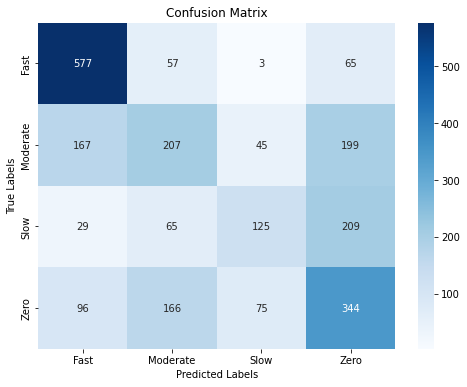

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_adni
y_pred =predictions



desired_order = ['Fast', 'Moderate','Slow', 'Zero']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Fast vs Rest: 0.8841213045034702
Class Moderate vs Rest: 0.7045723812944625
Class Slow vs Rest: 0.79350336513986
Class Zero vs Rest: 0.6999259905173776
Overall One-vs-Rest AUC: 0.7705307603637925


In [48]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [49]:
weighted_auc

0.7708307646042026

In [50]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.5159
Weighted Specificity: 0.8240


In [51]:
adni_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Fast": list(np.array(predictions_probs)[:, 0]),"Moderate": list(np.array(predictions_probs)[:, 1]),"Slow": list(np.array(predictions_probs)[:, 2]),"Zero": list(np.array(predictions_probs)[:, 3])})
adni_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_mmse.csv",index=False)

In [52]:
existing_columns = [col for col in categorical_columns if col in habs_testing_df.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")


Existing categorical columns: ['Diagnosis', 'Diagnosis of Depression', 'Gender', 'Ethnicity', 'Race', 'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 'Diagnosis of Cancer', 'Diagnosis of Stroke', 'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 'Diagnosis of traumatic brain injury', 'Diagnosis of Heart Attack', 'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']


In [53]:
habs_testing_df_new= habs_testing_df[existing_columns].astype(object)

In [54]:
habs_testing_df_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(habs_testing_df.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
habs_testing_df_continuous  =habs_testing_df[columns_not_in_existing].fillna(-9999)


# Concatenating row-wise (default axis=0)
combined_df_habs = pd.concat([habs_testing_df_continuous, habs_testing_df_new], axis=1)
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
# Define the bins and labels
bins = [-float('inf'),-0.767, -0.148, 0, float('inf')]
labels = ['Fast','Moderate','Slow','Zero']


combined_df_habs['MMSE_CATEGORY'] = pd.cut(combined_df_habs['MMSE rate'], bins=bins, labels=labels)
combined_df_habs.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_final_mmse.csv")

In [55]:
X_habs= combined_df_habs.drop(columns=['MMSE rate','MMSE_CATEGORY',"Med_ID"], axis=1)
y_habs =combined_df_habs.MMSE_CATEGORY
model_features = X.columns
for feature in model_features:
    if (feature not in  X_habs.columns) and (feature in categorical_columns) :
        X_habs[feature] = "unknown"
    elif (feature not in  X_habs.columns) and (feature not in categorical_columns) :
        X_habs[feature] = -9999
X_habs= X_habs[model_features ]
#X_habs.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\dataset\\Gradient boosting\\habs_testing_final_mmse.csv",index=False)

In [56]:
predictions = model_mmse.predict(X_habs)
predictions_probs = model_mmse.predict_proba(X_habs)

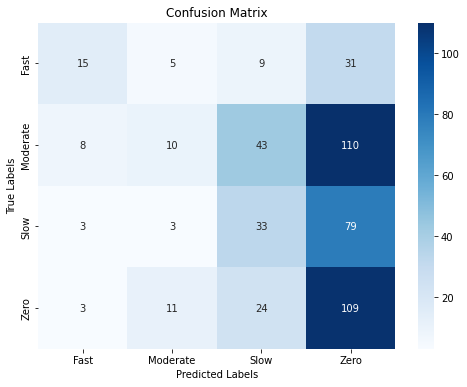

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_habs
y_pred =predictions



desired_order =  ['Fast', 'Moderate','Slow', 'Zero']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Fast vs Rest: 0.753019877675841
Class Moderate vs Rest: 0.570400359874044
Class Slow vs Rest: 0.6271298538247692
Class Zero vs Rest: 0.582334366411321
Overall One-vs-Rest AUC: 0.6332211144464939


In [59]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [60]:
weighted_auc 

0.6095244532516106

In [61]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.3367
Weighted Specificity: 0.7413


In [62]:
habs_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Fast": list(np.array(predictions_probs)[:, 0]),"Moderate": list(np.array(predictions_probs)[:, 1]),"Slow": list(np.array(predictions_probs)[:, 2]),"Zero": list(np.array(predictions_probs)[:, 3])})
habs_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_mmse.csv",index=False)